# Section 36 Part 3 Neural Networks (Facial Recognitin)

##### Lecture 218 The Main Idea
##### Lecture 219 The Main Idea 2
##### Lecture 220 Neural Net Training
##### Lecture 221 Hyper Parameter Tuning

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_lfw_people
from sklearn.neural_network import MLPClassifier #multilayer perceptrons
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
faces = fetch_lfw_people(min_faces_per_person=30, resize=None)

In [3]:
faces.data.shape

(2370, 11750)

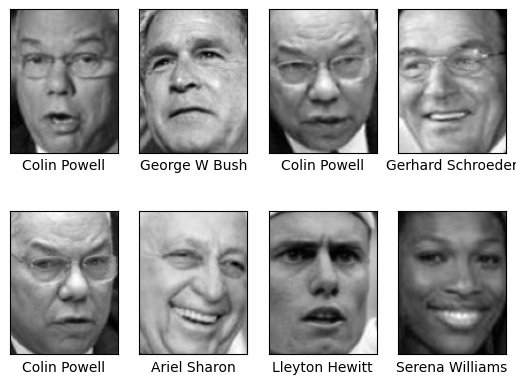

In [4]:
fig, splts = plt.subplots(2, 4)
for i, splt in enumerate(splts.flat):
    n = np.random.randint(0, faces.data.shape[0])
    splt.imshow(faces.images[n], cmap = 'gray')
    splt.set(xticks=[], yticks=[], xlabel = faces.target_names[faces.target[n]])
fig.savefig(r'output/facesPlot.png')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
X_train.shape

(1659, 11750)

In [7]:
X_test.shape

(711, 11750)

In [8]:
# Reduce dimensions ie EigenFaces

# NB:  Tutor did pca.transform without the fit, I couldn't get that to work error that PCA has no transform

pca = PCA(n_components = 150).fit(X_train)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

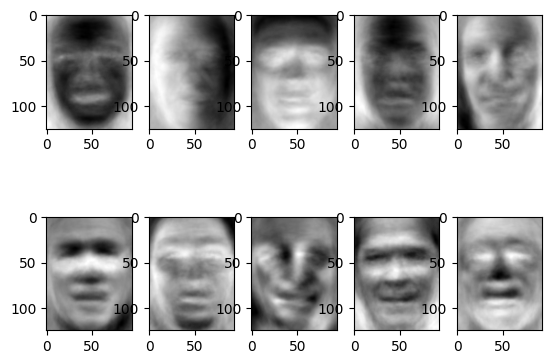

In [9]:
eigen_faces = pca.components_.reshape(150, 125, 94)

fig, subplots = plt.subplots(2,5)
for i, plot in enumerate(subplots.flat):
    plot.imshow(eigen_faces[i], cmap='gray')
fig.savefig(r'output/EigenFaces.png')

In [10]:
NN = MLPClassifier()
NN.fit(X_train_pca, y_train)

MLPClassifier()

In [11]:
NN.score(X_test_pca, y_test)
# My results are way lower than the tutors results he got 57.9% accuracy

0.15611814345991562

In [12]:
y_pred = NN.predict(X_test_pca)

In [13]:
y_pred[100]

8

In [14]:
y_test[100]
# That one is correct

8

In [15]:
faces.target_names[7]

'Donald Rumsfeld'

In [16]:
y_pred[500]

5

In [17]:
y_test[500]

31

In [18]:
faces.target_names[5]

'Colin Powell'

In [19]:
y_pred[20]

19

In [20]:
y_test[20]

19

In [21]:
faces.target_names[7]

'Donald Rumsfeld'

In [22]:
faces.target_names[8]

'George W Bush'

In [23]:
print(classification_report(y_test, y_pred, target_names= faces.target_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       0.00      0.00      0.00         9
             Alvaro Uribe       0.00      0.00      0.00        12
             Andre Agassi       0.00      0.00      0.00        15
             Ariel Sharon       0.14      0.12      0.12        26
    Arnold Schwarzenegger       0.00      0.00      0.00         9
             Colin Powell       0.16      0.20      0.18        66
            David Beckham       0.00      0.00      0.00         8
          Donald Rumsfeld       0.14      0.19      0.16        31
            George W Bush       0.29      0.38      0.33       152
        Gerhard Schroeder       0.12      0.12      0.12        34
  Gloria Macapagal Arroyo       0.43      0.25      0.32        12
          Guillermo Coria       0.00      0.00      0.00        10
                Hans Blix       0.00      0.00      0.00        15
              Hugo Chavez       0.14      0.13      0.14     

In [24]:
NN.score(X_train_pca, y_train)

1.0

In [25]:
NN.score(X_test_pca, y_test)

# My results are far lower than the tutors results.

0.15611814345991562

### Fine Tuning

In [26]:
# Row 1 configure only 1 layer, row 2 configure 2 layers, row 3 configure 3 layers
# Tuples give number of neurones per layer eg (100, ) 100 neurons

param_grid = {
    'hidden_layer_sizes': [
        (100, ), (50, ), (25, ), (10, ), (5 ),
        (100, 50, ), (50, 25, ), (25, 10, ), (10, 5,),
        (100, 50, 25, ), (50, 25, 10, ), (25, 10, 5, )
    ],
}

In [32]:
grid = GridSearchCV(MLPClassifier(), param_grid, cv=5)
grid.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(100,), (50,), (25,), (10,), 5,
                                                (100, 50), (50, 25), (25, 10),
                                                (10, 5), (100, 50, 25),
                                                (50, 25, 10), (25, 10, 5)]})

In [33]:
grid.best_params_
# My results different from the tutor's again, his 1 hidden layer with 50 mine 1 layer with 100

{'hidden_layer_sizes': (100,)}

In [35]:
grid.score(X_test_pca, y_test)
# Again getting a lot different of a result than the tutor
# Got very slightly better on re-training the model but still well short of the tutor's results.

0.14064697609001406